When you finish this, you will have finished the last programming assignment of Week 4, and also the last programming assignment of this course!

You will use the functions you'd implemented in the previous assignment to build a deep network, and apply it to cat vs non-cat classification. Hopefully, you will see an improvement in accuracy relative to your previous logistic regression implementation.

After this assignment you will be able to:

Build and apply a deep neural network to supervised learning.
Let's get started!

1 - Packages
Let's first import all the packages that you will need during this assignment.

* numpy is the fundamental package for scientific computing with Python.

* matplotlib is a library to plot graphs in Python.

* h5py is a common package to interact with a dataset that is stored on an H5 file.

* PIL and scipy are used here to test your model with your own picture at the end.

* dnn_app_utils provides the functions implemented in the "Building your Deep Neural Network: Step by Step" assignment to this notebook.

* np.random.seed(1) is used to keep all the random function calls consistent. It will help us grade your work.

In [17]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from dnn_app_utils_v3 import *

plt.rcParams['figure.figsize'] =(5.0, 4.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

np.random.seed(1)



2 - Dataset

You will use the same "Cat vs non-Cat" dataset as in "Logistic Regression as a Neural Network" (Assignment 2). The model you had built had 70% test accuracy on classifying cats vs non-cats images. Hopefully, your new model will perform a better!

**Problem Statement**: You are given a dataset ("data.h5") containing: - a training set of m_train images labelled as cat (1) or non-cat (0) - a test set of m_test images labelled as cat and non-cat - each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB).

Let's get more familiar with the dataset. Load the data by running the cell below.

In [18]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

y = 1. Its's a cat picture.


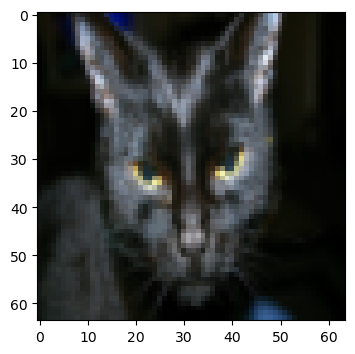

In [19]:
#Example of a picture
index = 25
plt.imshow(train_x_orig[index])
print("y = " + str(train_y[0, index]) + ". Its's a " + classes[train_y[0, index]].decode("utf-8") + " picture.")

In [20]:
# Explore your dataset
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print("Number of training example: " + str(m_train))
print("Number of testing example: " + str(m_test))
print("Each image of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print("train_x_orig shape: " + str(train_x_orig.shape))
print("train_y shape" + str(train_y.shape))
print("test_x_orig shape: " + str(test_x_orig.shape))
print("test_y shape" + str(test_y.shape))

Number of training example: 209
Number of testing example: 50
Each image of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape(1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape(1, 50)


As usual, you reshape and standardize the images before feeding them to the network. The code is given in the cell below.

In [21]:
#Reshape the training and test examples

train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T
#train_x_ff = train_x_orig.flatten()  -> gives you (shape[0]*shape[1]*shape[2]*shape[3]) 
# but what we want is 2d array where each column have image data for m samples, thats why we require transpose in above (train/test)_x_flatten
#assert(train_x_flatten.shape == train_x_orig.flatten().shape)

train_x = train_x_flatten/255
test_x = test_x_flatten/255
#print("train_x's shape: " + str(train_x_ff.shape))

print("train_x's shape: " + str(train_x.shape))
print("test_x's shape: " + str(test_x.shape))


train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


3 - Architecture of your model
Now that you are familiar with the dataset, it is time to build a deep neural network to distinguish cat images from non-cat images.

You will build two different models:

* A 2-layer neural network

* An L-layer deep neural network

You will then compare the performance of these models, and also try out different values for.

Let's look at the two architectures.

3.1 - 2-layer neural network

The model can be summarized as: ***INPUT -> LINEAR -> RELU -> LINEAR -> SIGMOID -> OUTPUT***.
Detailed Architecture of figure 2:

* The input is a (64,64,3) image which is flattened to a vector of size.

* The corresponding vector:[x[0], .... x[12287]].T is then multiplied by the weight matrix of size (n[l], 12288).

* You then add a bias term and take its relu to get the following vector: [a0[1], a1[1], ...., an-1[1]].

* You then repeat the same process.

* You multiply the resulting vector by W2 and add your intercept (bias).

* Finally, you take the sigmoid of the result. If it is greater than 0.5, you classify it to be a cat.

3.2 - L-layer deep neural network

It is hard to represent an L-layer deep neural network with the above representation. However, here is a simplified network representation:

The model can be summarized as: ***[LINEAR -> RELU] (L-1) -> LINEAR -> SIGMOID***

Detailed Architecture of figure 3:

* The input is a (64,64,3) image which is flattened to a vector of size (12288,1).

* The corresponding vector: [x[0], .... x[12287]] is then multiplied by the weight matrix W1 and then you add the intercept b[1]. The result is called the linear unit.

* Next, you take the relu of the linear unit. This process could be repeated several times for each  depending on the model architecture.

* Finally, you take the sigmoid of the final linear unit. If it is greater than 0.5, you classify it to be a cat.


3.3 - General methodology
As usual you will follow the Deep Learning methodology to build the model: 1. Initialize parameters / Define hyperparameters 2. Loop for num_iterations: a. Forward propagation b. Compute cost function c. Backward propagation d. Update parameters (using parameters, and grads from backprop) 4. Use trained parameters to predict labels

Let's now implement those two models!

4 - Two-layer neural network

Question: Use the helper functions you have implemented in the previous assignment to build a 2-layer neural network with the following structure: LINEAR -> RELU -> LINEAR -> SIGMOID. The functions you may need and their inputs are:

def initialize_parameters(n_x, n_h, n_y):

    ...

    return parameters 

def linear_activation_forward(A_prev, W, b, activation):

    ...

    return A, cache

def compute_cost(AL, Y):

    ...

    return cost

def linear_activation_backward(dA, cache, activation):

    ...

    return dA_prev, dW, db

def update_parameters(parameters, grads, learning_rate):

    ...
    
    return parameters

In [22]:
n_x = 12288
n_h = 7
n_y = 1
layer_dims = (n_x, n_h, n_y)



In [42]:
def two_layer_model(X, Y, layers_dims, learning_rate = 0.0008, num_iterations = 3000, print_cost=False):
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 1 if cat, 0 if non-cat), of shape (1, number of examples)
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- If set to True, this will print the cost every 100 iterations 
    
    Returns:
    parameters -- a dictionary containing W1, W2, b1, and b2
    """
    np.random.seed(1)
    grads = {}
    costs = []
    m = X.shape[1]

    (n_x, n_h, n_y) = layer_dims

    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented
    parameters = initialize_parameters(n_x, n_h, n_y)

    # Get W1, b1, W2, b2 from dictionary parameters
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    for i in range(0, num_iterations):
        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1, W2, b2". Output: "A1, cache1, A2, cache2".
        A1, cache1 = linear_activation_forward(X, W1, b1, "relu")
        A2, cache2 = linear_activation_forward(A1, W2, b2, "sigmoid")

        # Compute cost
        cost = compute_cost(A2, Y)

        # Initialize backward propagation
        dA2 = -(np.divide(Y, A2) - np.divide(1-Y, 1-A2))

        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, "sigmoid")
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, "relu")

        # set grads['dW1'] to dw1, grads['db1'] to db1, ....
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2

        #update parameters
        parameters = update_parameters(parameters, grads, learning_rate)

        # Retrieve parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]

        if print_cost and i%100 == 0:
            print("Cost after iteration {} : {}". format(i, np.squeeze(cost)))
        if print_cost and i%100 == 0:
            costs.append(cost)

    plt.plot(np.squeeze(costs))
    plt.ylabel("cost")
    plt.xlabel("iterations (per hundred)")
    plt.title("Learning rate = " + str(learning_rate))
    plt.show()

    return parameters


Cost after iteration 0 : 0.6930497356599888
Cost after iteration 100 : 0.6884654375643305
Cost after iteration 200 : 0.681994959997641
Cost after iteration 300 : 0.6720373464022137
Cost after iteration 400 : 0.6608186164755679
Cost after iteration 500 : 0.6534019228190483
Cost after iteration 600 : 0.6502325752743155
Cost after iteration 700 : 0.6487941215584658
Cost after iteration 800 : 0.6477529458180896
Cost after iteration 900 : 0.6467542840351759
Cost after iteration 1000 : 0.6457212311321098
Cost after iteration 1100 : 0.6446302708709664
Cost after iteration 1200 : 0.6434645505939145
Cost after iteration 1300 : 0.6422092757152361
Cost after iteration 1400 : 0.6408461829693073
Cost after iteration 1500 : 0.6393573097121866
Cost after iteration 1600 : 0.6377224901167364
Cost after iteration 1700 : 0.6359210436135528
Cost after iteration 1800 : 0.633932421773234
Cost after iteration 1900 : 0.6317372899475449
Cost after iteration 2000 : 0.6293044726403496
Cost after iteration 2100 :

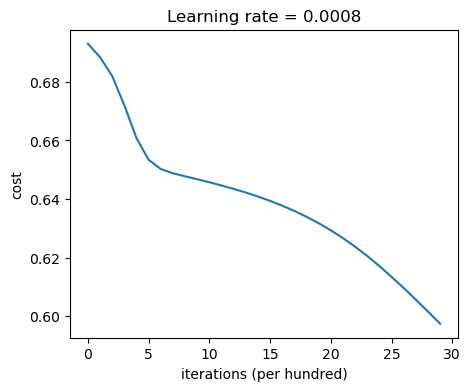

In [40]:
parameters = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 3000, print_cost=True)

In [37]:
prediction_train = predict(train_x, train_y, parameters)

Accuracy: 0.9999999999999998


In [38]:
prediction_test = predict(test_x, test_y, parameters)

Accuracy: 0.72


Note: You may notice that running the model on fewer iterations (say 1500) gives better accuracy on the test set. This is called "early stopping" and we will talk about it in the next course. Early stopping is a way to prevent overfitting.

Congratulations! It seems that your 2-layer neural network has better performance (72%) than the logistic regression implementation (70%, assignment week 2). Let's see if you can do even better with an L-layer model.

5 - L-layer Neural Network
Question: Use the helper functions you have implemented previously to build an L-layer neural network with the following structure: [LINEAR -> RELU](L-1) -> LINEAR -> SIGMOID. The functions you may need and their inputs are:

def initialize_parameters_deep(layers_dims):

    ...

    return parameters 

def L_model_forward(X, parameters):

    ...

    return AL, caches

def compute_cost(AL, Y):

    ...

    return cost

def L_model_backward(AL, Y, caches):

    ...

    return grads

def update_parameters(parameters, grads, learning_rate):

    ...

    return parameters

In [41]:
layers_dims = [12288, 20, 7, 5, 1]  # 4 layer model

In [57]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):#lr was 0.009
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)

    costs = []
    # Parameters_initialization
    parameters = initialize_parameters_deep(layers_dims)

    # Loop (gradient descent)
    for i in range(0, num_iterations):
        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)

        # Compute_cost
        cost = compute_cost(AL, Y)

        # Backward propagation
        grads = L_model_backward(AL, Y, caches)

        # Update parameters
        parameters = update_parameters(parameters, grads, learning_rate)

        if print_cost and i%100 == 0:
            print("Cost after iteration {} : {}". format(i, np.squeeze(cost)))
        if print_cost and i%100 == 0:
            costs.append(cost)

    plt.plot(np.squeeze(costs))
    plt.ylabel("cost")
    plt.xlabel("iterations (per hundred)")
    plt.title("Learning rate = " + str(learning_rate))
    plt.show()

    return parameters
        

Cost after iteration 0 : 0.7717493284237686
Cost after iteration 100 : 0.6720534400822914
Cost after iteration 200 : 0.6482632048575212
Cost after iteration 300 : 0.6115068816101354
Cost after iteration 400 : 0.5670473268366111
Cost after iteration 500 : 0.5401376634547801
Cost after iteration 600 : 0.5279299569455268
Cost after iteration 700 : 0.46547737717668514
Cost after iteration 800 : 0.3691258524959279
Cost after iteration 900 : 0.39174697434805356
Cost after iteration 1000 : 0.31518698886006163
Cost after iteration 1100 : 0.2726998441789385
Cost after iteration 1200 : 0.23741853400268137
Cost after iteration 1300 : 0.19960120532208647
Cost after iteration 1400 : 0.18926300388463305
Cost after iteration 1500 : 0.1611885466582775
Cost after iteration 1600 : 0.14821389662363316
Cost after iteration 1700 : 0.1377748781297294
Cost after iteration 1800 : 0.1297401754919012
Cost after iteration 1900 : 0.12122535068005211
Cost after iteration 2000 : 0.11382060668633709
Cost after itera

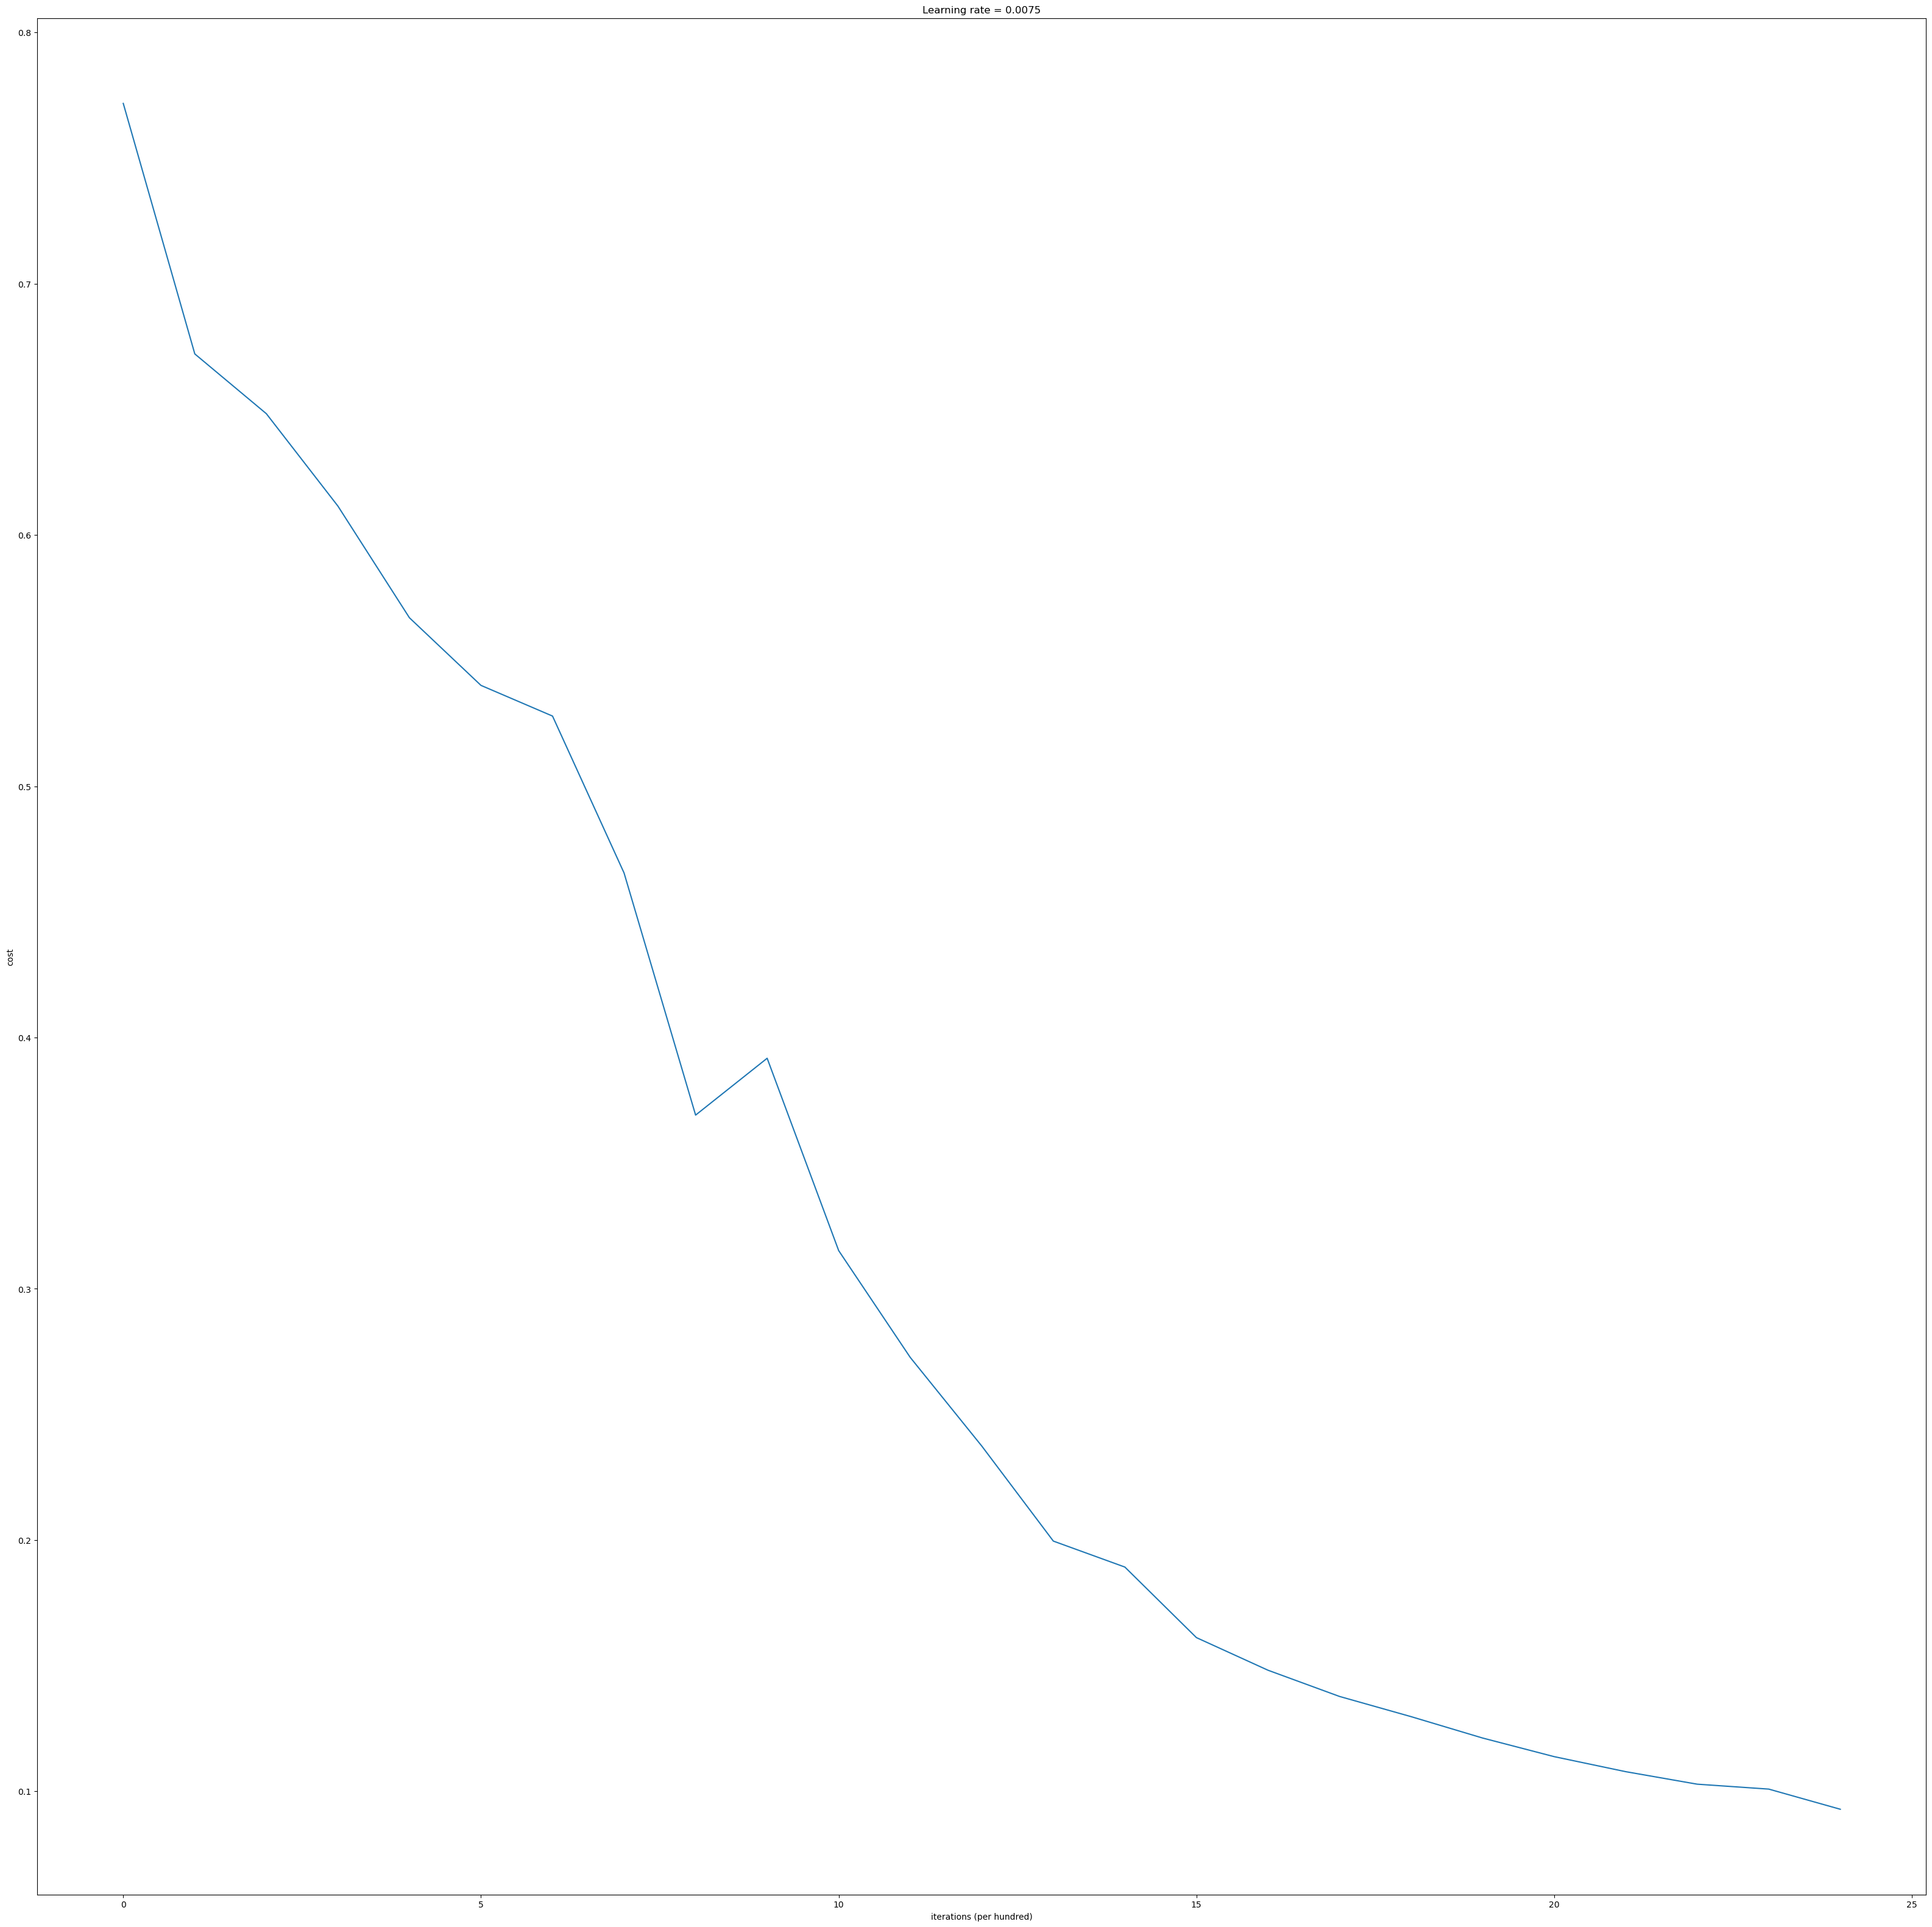

In [58]:
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True)


In [59]:
pred_train = predict(train_x, train_y, parameters)


Accuracy: 0.9856459330143539


In [60]:
pred_test = predict(test_x, test_y, parameters)


Accuracy: 0.8


Congrats! It seems that your 4-layer neural network has better performance (80%) than your 2-layer neural network (72%) on the same test set.

This is good performance for this task. Nice job!

Though in the next course on "Improving deep neural networks" you will learn how to obtain even higher accuracy by systematically searching for better hyperparameters (learning_rate, layers_dims, num_iterations, and others you'll also learn in the next course).

6) Results Analysis

First, let's take a look at some images the L-layer model labeled incorrectly. This will show a few mislabeled images.


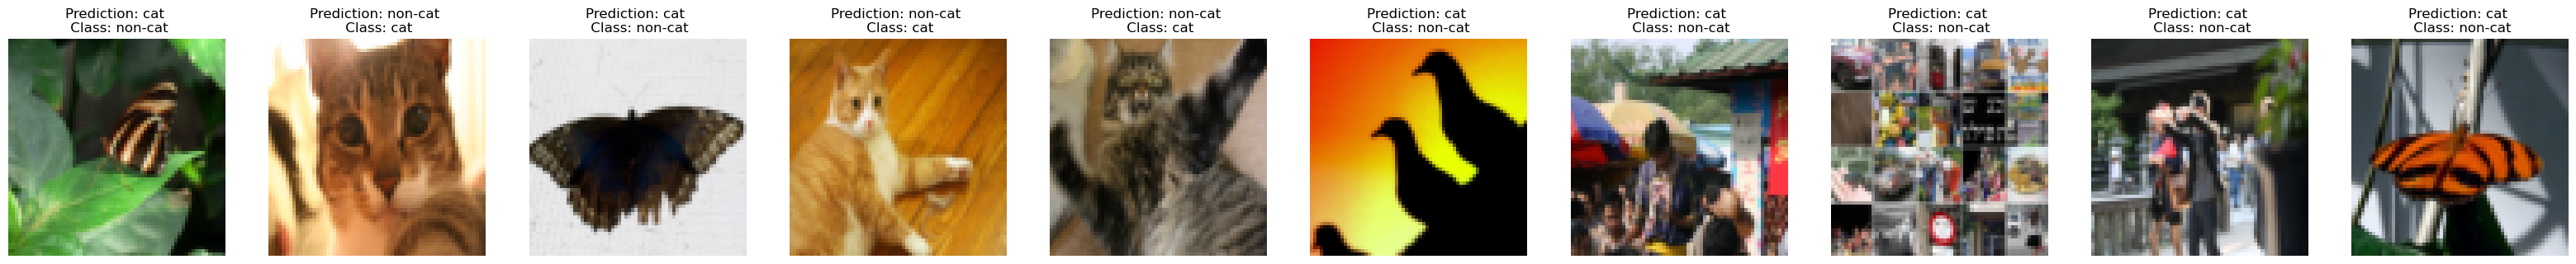

In [61]:
print_mislabeled_images(classes, test_x, test_y, pred_test)

A few types of images the model tends to do poorly on include:

* Cat body in an unusual position

* Cat appears against a background of a similar color

* Unusual cat color and species

* Camera Angle

* Brightness of the picture

* Scale variation (cat is very large or small in image)

7) Test with your own image (optional/ungraded exercise)

Congratulations on finishing this assignment. You can use your own image and see the output of your model. To do that: 1. Click on "File" in the upper bar of this notebook, then click "Open" to go on your Coursera Hub. 2. Add your image to this Jupyter Notebook's directory, in the "images" folder 3. Change your image's name in the following code 4. Run the code and check if the algorithm is right (1 = cat, 0 = non-cat)!

C:\Users\om_ar\AppData\Local\Temp\ipykernel_23776\1405287176.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  filename = Image.open("test.png").convert("RGB").resize([num_px, num_px], Image.ANTIALIAS)


Accuracy: 1.0
y = 1.0, your L- layer model predicts a "cat


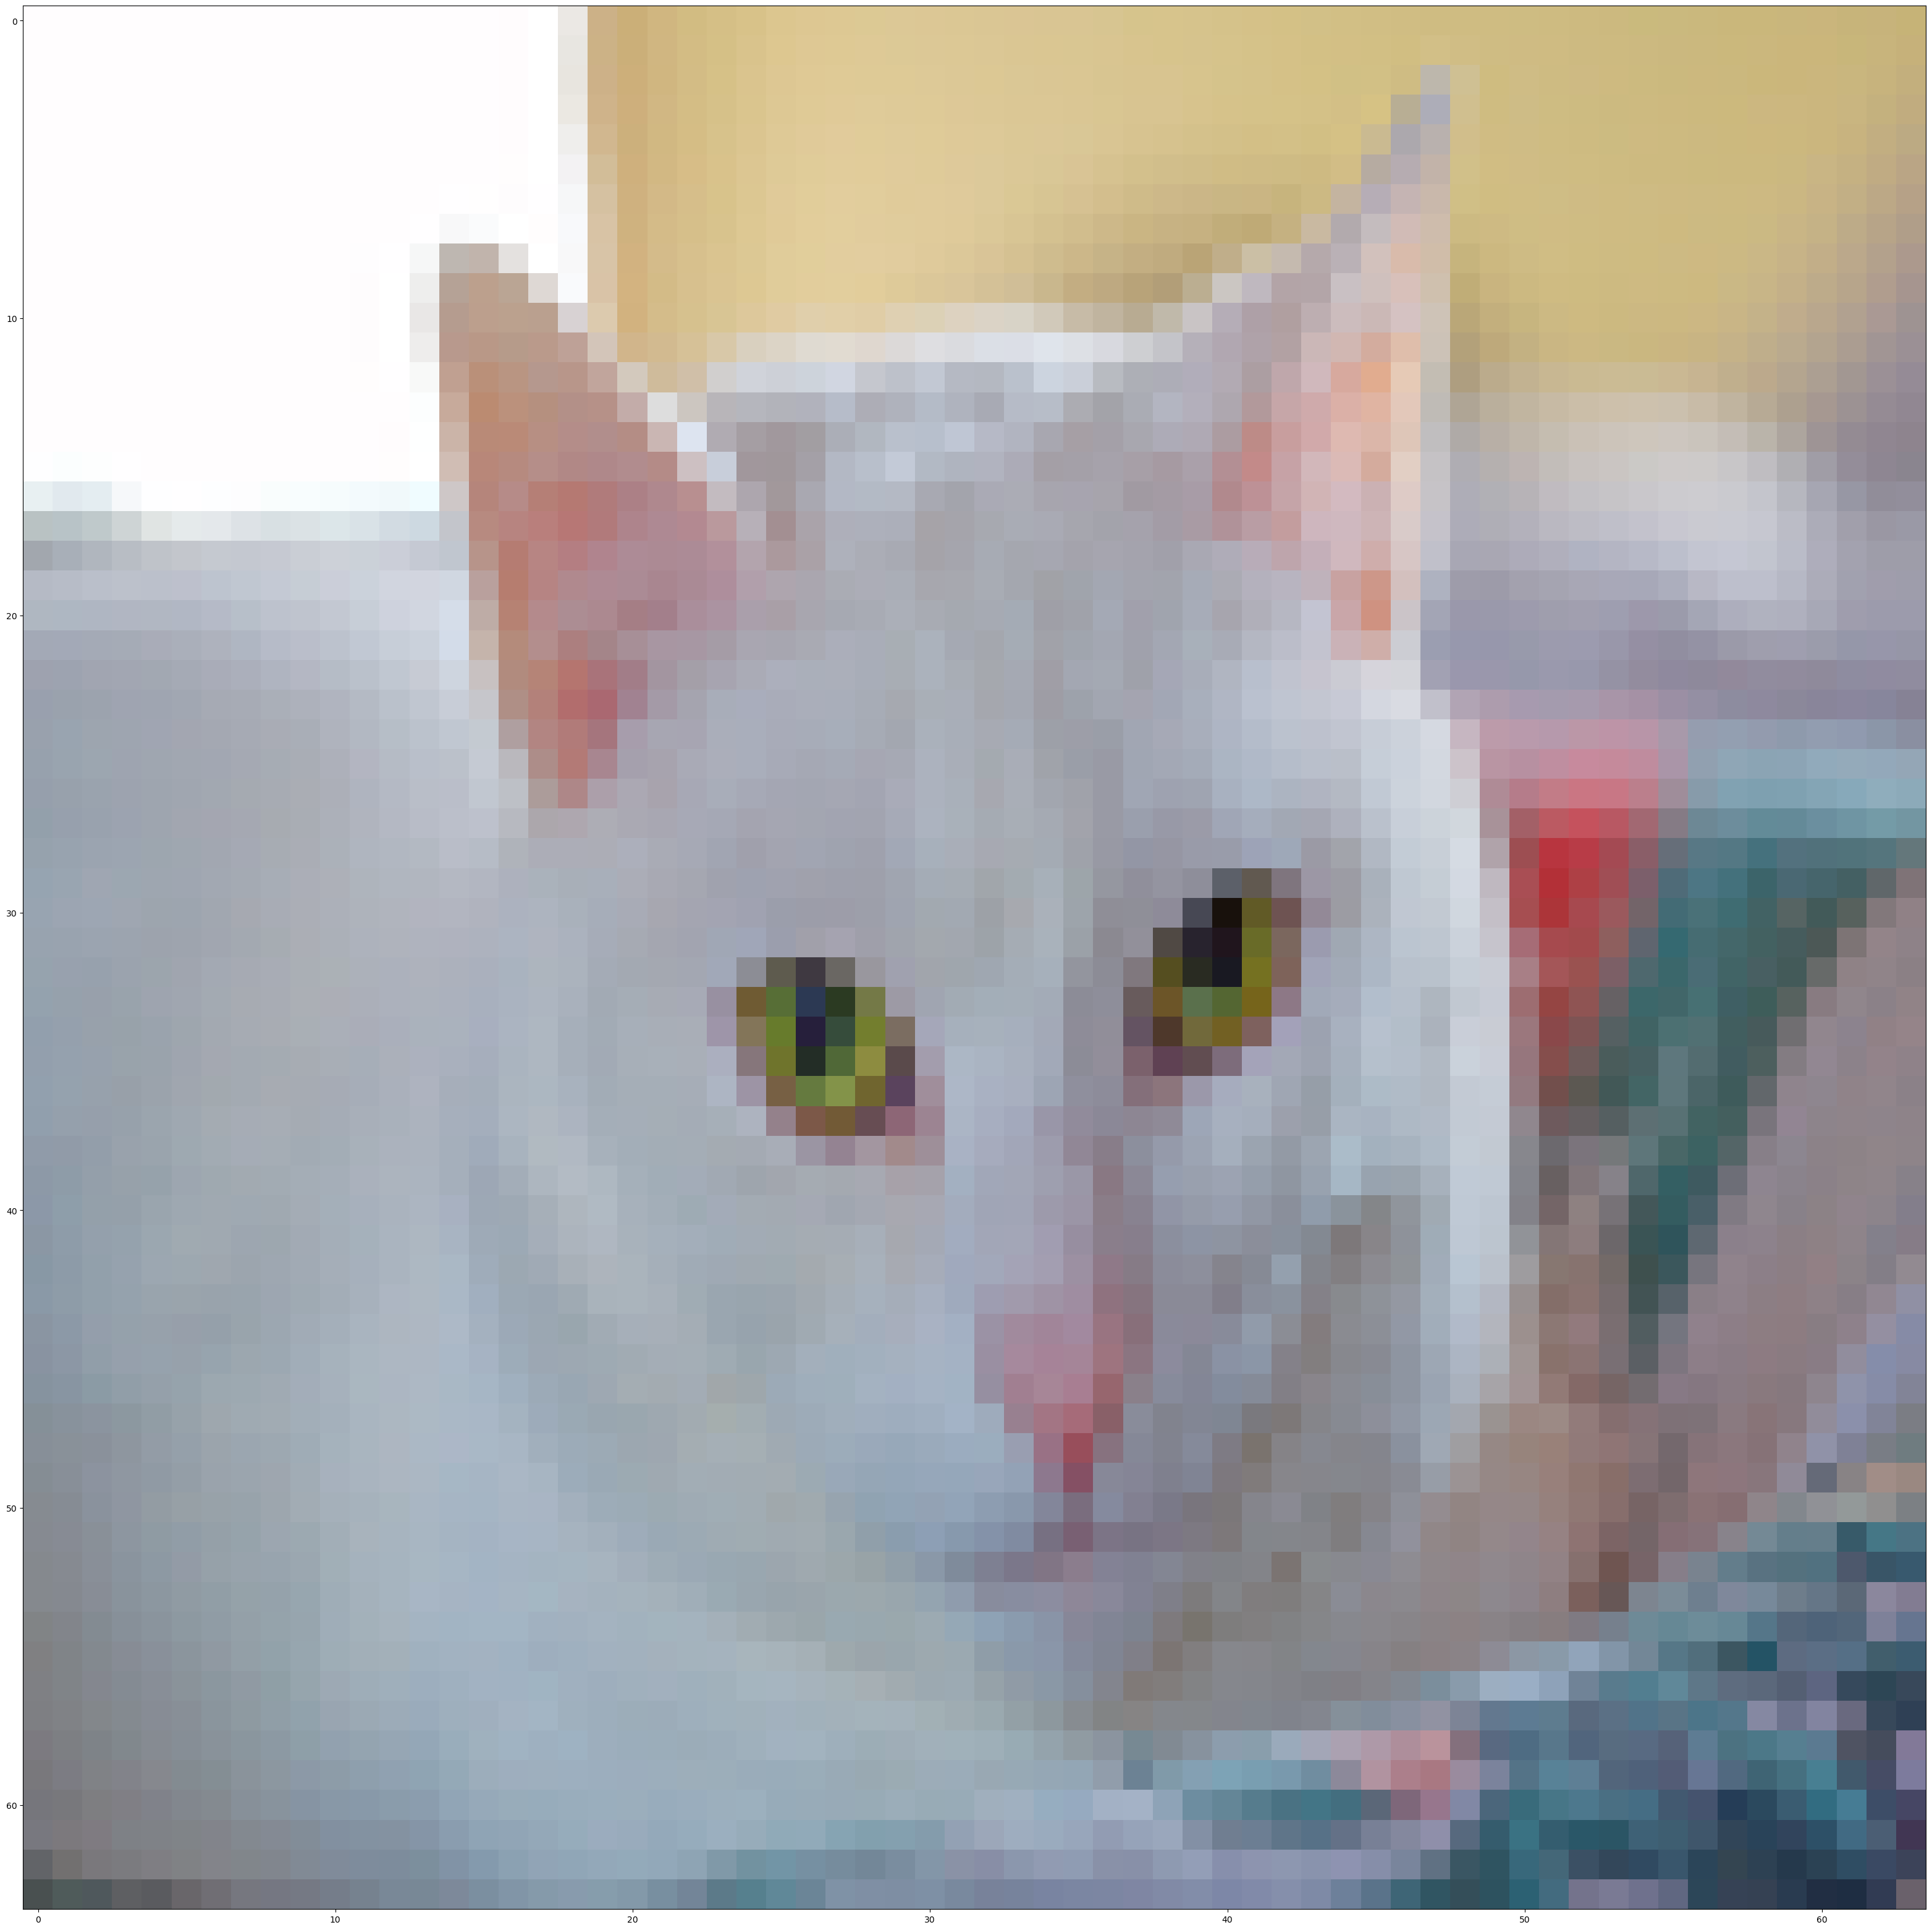

In [62]:
from PIL import Image

filename = Image.open("test.png").convert("RGB").resize([num_px, num_px], Image.ANTIALIAS)

my_label_y = [1] 

image = np.array(filename)
my_image = image.reshape(num_px*num_px*3, 1)
my_image = my_image/255
my_predicted_image = predict(my_image, my_label_y, parameters)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your L- layer model predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8"))

In [63]:
import pickle # For storing an array in a '.pickle' file for later use
my_content = [train_x_orig, train_y, test_x_orig, test_y, classes]

# Saving variables in an array
with open("trainingDataset.pickle",'wb') as fileToBeWritten:
# For compatibility we use open(filename, 'wb') for non-text files and open(filename, 'w') for text files
    pickle.dump(my_content,fileToBeWritten)

# Loading variables
with open('trainingDataset.pickle','rb') as fileToBeRead:
    ttrain_x_orig, train_y, test_x_orig, test_y, classes = pickle.load(fileToBeRead)
